In [27]:
import os
os.chdir('/home/jupyter/ntu/csie-cv/hw9')
from PIL import Image
import numpy as np
import copy
import random
from IPython.display import display
from math import sqrt

In [28]:
def load_image(path='./lena.bmp'):
    img = Image.open(path)
    img_array = np.array(img)
    width, height = img_array.shape
    img_list = img_array.tolist()
    return copy.deepcopy(img_list), width, height

img, width, height = load_image('./lena.bmp')

In [29]:
def save_image(img, path='./lena.bmp'):
    img_ = Image.fromarray(np.array(img, dtype='uint8'), mode='L')
    img_.save(path)
    return img_

def zeros(height, width):
    return [ [0 for x in range(width)] for y in range(height)]

def img_pad(img, height=height, width=width):
    pad = zeros(height+2, width+2)
    for y in range(height):
        for x in range(width):
            pad[y+1][x+1] = img[y][x]

    for y in range(height): 
        pad[y+1][0] = img[y][0]
        pad[y+1][width+1] = img[y][width-1]

    # left, right column padding
    for x in range(width+2):
        pad[0][x] = pad[1][x]
        pad[height+1][x] =pad[height][x]
    return pad

def img_pad_ntimes(img, n=1, height=height, width=width):
    for i in range(n):
        img = img_pad(img, height+i*2, width+i*2)
    return img

def convolution(img, kernels, n=1, height=height, width=width, map=lambda x:x):
    img = img_pad_ntimes(img, n, height, width)
    convoluted = zeros(height, width)
    for y in range(height):
        for x in range(width):
            knl_results = []
            for kernel in kernels:
                m = sum([img[y+n+y_][x+n+x_]*s for (y_, x_), s in kernel.items()])
                knl_results.append(m)

            convoluted[y][x] = map(*knl_results)

    return convoluted

def gradient2(v1, v2):
    return sqrt(v1**2+v2**2)

def clamp(x, th):
    return 0 if x >= th else 255

## a. Robert's Operator: 12

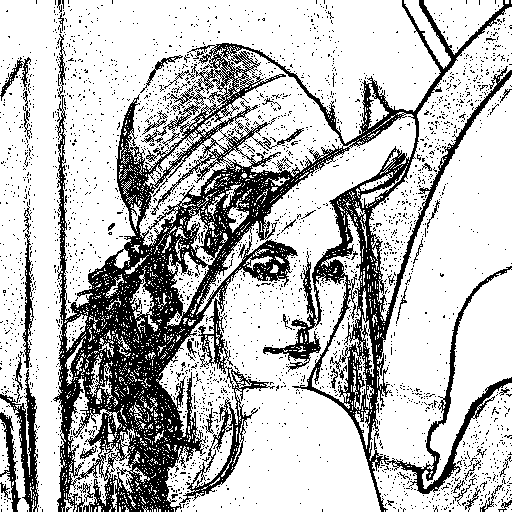

In [30]:
def roberts(img, th=30, height=height, width=width):
    img_ = copy.deepcopy(img)
    k1={(0,0):-1, (1,1):1}
    k2={(0,1):-1, (1,0):1}

    img_ = convolution(img, [k1, k2], 1, height, width, map=lambda v1, v2: clamp(gradient2(v1, v2), th))
    return img_

save_image(roberts(img, th=12), './roberts_12.bmp')

## b. Prewitt's Edge Detector: 24

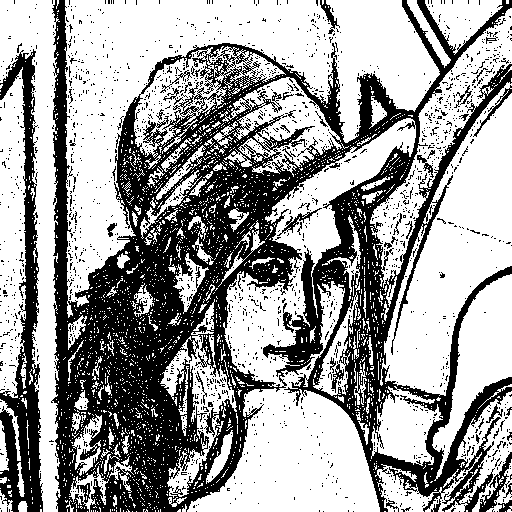

In [31]:
def prewitt(img, th=30, height=height, width=width):
    img_ = copy.deepcopy(img)
    k1={(-1,-1):-1, (-1,0):-1, (-1,1):-1, (1,-1):1, (1,0):1, (1,1):1}
    k2={(-1,-1):-1, (0,-1):-1, (1,-1):-1, (-1,1):1, (0,1):1, (1,1):1}

    img_ = convolution(img, [k1, k2], 1, height, width, map=lambda v1, v2: clamp(gradient2(v1, v2), th))
    return img_

save_image(prewitt(img, th=24), './prewitt_24.bmp')

## c. Sobel's Edge Detector: 38

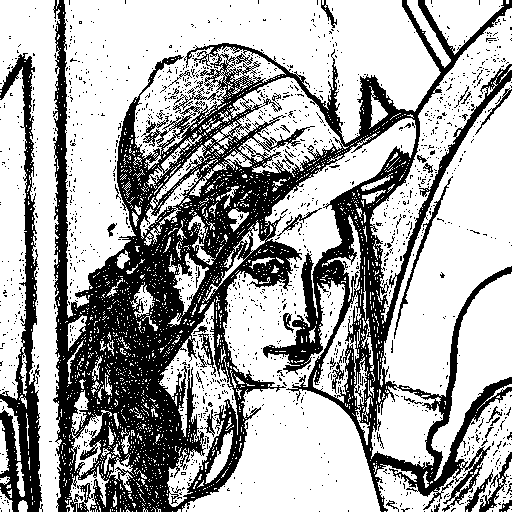

In [33]:
def sobel(img, th=30, height=height, width=width):
    img_ = copy.deepcopy(img)
    k1={(-1,-1):-1, (-1,0):-2, (-1,1):-1, (1,-1):1, (1,0):2, (1,1):1}
    k2={(-1,-1):-1, (0,-1):-2, (1,-1):-1, (-1,1):1, (0,1):2, (1,1):1}

    img_ = convolution(img, [k1, k2], 1, height, width, map=lambda v1, v2: clamp(gradient2(v1, v2), th))
    return img_

save_image(sobel(img, th=38), './sobel_38.bmp')

## d. Frei and Chen's Gradient Operator: 30

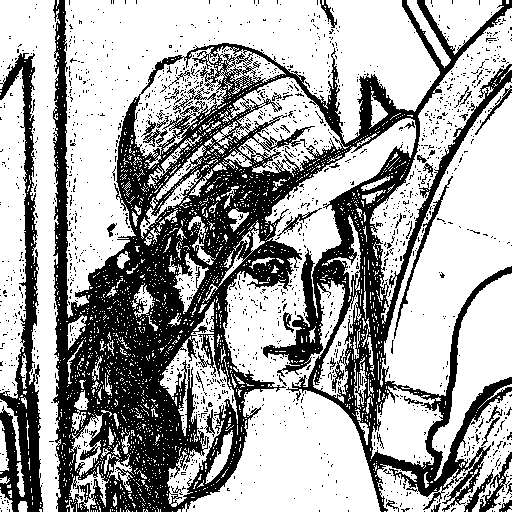

In [34]:
def frei_chen(img, th=30, height=height, width=width):
    img_ = copy.deepcopy(img)
    k1={(-1,-1):-1, (-1,0):-sqrt(2), (-1,1):-1, (1,-1):1, (1,0):sqrt(2), (1,1):1}
    k2={(-1,-1):-1, (0,-1):-sqrt(2), (1,-1):-1, (-1,1):1, (0,1):sqrt(2), (1,1):1}

    img_ = convolution(img, [k1, k2], 1, height, width, map=lambda v1, v2: clamp(gradient2(v1, v2), th))
    return img_

save_image(frei_chen(img, th=30), './frei_chen_30.bmp')

## e. Kirsch's Compass Operator: 135

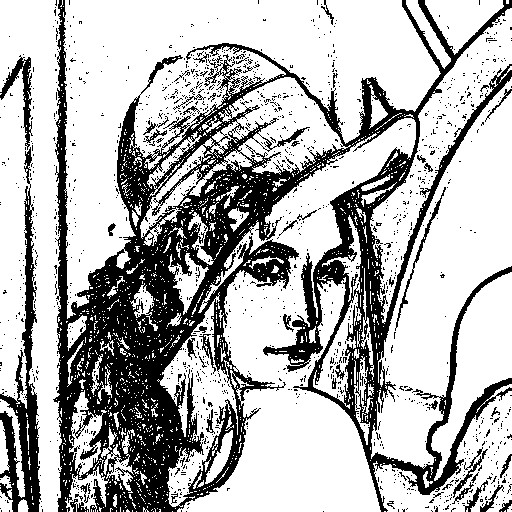

In [43]:
def krisch(img, th=30, height=height, width=width):
    img_ = copy.deepcopy(img)
    k1={(-1,-1):-3, (-1,0):-3, (-1,1):5, (0,1):5, (1,1):5, (1,0):-3, (1,-1):-3, (0,-1):-3}
    k2={(-1,-1):-3, (-1,0):5, (-1,1):5, (0,1):5, (1,1):-3, (1,0):-3, (1,-1):-3, (0,-1):-3}
    k3={(-1,-1):5, (-1,0):5, (-1,1):5, (0,1):-3, (1,1):-3, (1,0):-3, (1,-1):-3, (0,-1):-3}
    k4={(-1,-1):5, (-1,0):5, (-1,1):-3, (0,1):-3, (1,1):-3, (1,0):-3, (1,-1):-3, (0,-1):5}
    k5={(-1,-1):5, (-1,0):-3, (-1,1):-3, (0,1):-3, (1,1):-3, (1,0):-3, (1,-1):5, (0,-1):5}
    k6={(-1,-1):-3, (-1,0):-3, (-1,1):-3, (0,1):-3, (1,1):-3, (1,0):5, (1,-1):5, (0,-1):5}
    k7={(-1,-1):-3, (-1,0):-3, (-1,1):-3, (0,1):-3, (1,1):5, (1,0):5, (1,-1):5, (0,-1):-3}
    k8={(-1,-1):-3, (-1,0):-3, (-1,1):-3, (0,1):5, (1,1):5, (1,0):5, (1,-1):-3, (0,-1):-3}

    def map(v1, v2, v3, v4, v5, v6, v7, v8):
        return clamp(max((v1, v2, v3, v4, v5, v6, v7, v8)), th)

    img_ = convolution(img, [k1, k2, k3, k4, k5, k6, k7, k8], 1, height, width, map=map)
    return img_

save_image(krisch(img, th=135), './krisch_135.bmp')

## f. Robinson's Compass Operator: 43

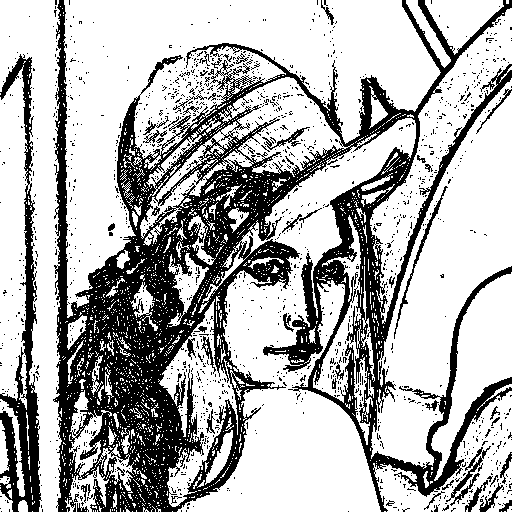

In [44]:
def robinson(img, th=30, height=height, width=width):
    img_ = copy.deepcopy(img)
    k1={(-1,-1):-1, (-1,0):0, (-1,1):1, (0,1):2, (1,1):1, (1,0):0, (1,-1):-1, (0,-1):-2}
    k2={(-1,-1):0, (-1,0):1, (-1,1):2, (0,1):1, (1,1):0, (1,0):-1, (1,-1):-2, (0,-1):-1}
    k3={(-1,-1):1, (-1,0):2, (-1,1):1, (0,1):0, (1,1):-1, (1,0):-2, (1,-1):-1, (0,-1):0}
    k4={(-1,-1):2, (-1,0):1, (-1,1):0, (0,1):-1, (1,1):-2, (1,0):-1, (1,-1):0, (0,-1):1}
    k5={(-1,-1):1, (-1,0):0, (-1,1):-1, (0,1):-2, (1,1):-1, (1,0):0, (1,-1):1, (0,-1):2}
    k6={(-1,-1):0, (-1,0):-1, (-1,1):-2, (0,1):-1, (1,1):0, (1,0):1, (1,-1):2, (0,-1):1}
    k7={(-1,-1):-1, (-1,0):-2, (-1,1):-1, (0,1):0, (1,1):1, (1,0):2, (1,-1):1, (0,-1):0}
    k8={(-1,-1):-2, (-1,0):-1, (-1,1):0, (0,1):1, (1,1):2, (1,0):1, (1,-1):0, (0,-1):-1}

    def map(v1, v2, v3, v4, v5, v6, v7, v8):
        return clamp(max((v1, v2, v3, v4, v5, v6, v7, v8)), th)

    img_ = convolution(img, [k1, k2, k3, k4, k5, k6, k7, k8], 1, height, width, map=map)
    return img_

save_image(robinson(img, th=43), './robinson_43.bmp')

## g. Nevatia-Babu 5x5 Operator: 12500

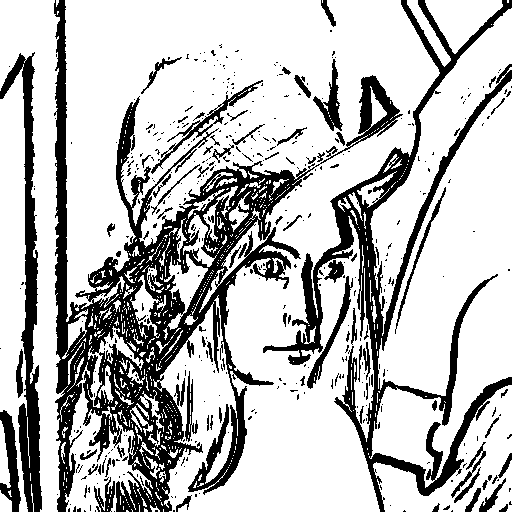

In [48]:
def nevatia_babu(img, th=30, height=height, width=width):
    img_ = copy.deepcopy(img)
    k1={(-2,-2):100, (-2,-1):100, (-2,0):100, (-2,1):100, (-2,2):100, 
        (-1,-2):100, (-1,-1):100, (-1,0):100, (-1,1):100, (-1,2):100, 
        (0,-2):0, (0,-1):0, (0,0):0, (0,1):0, (0,2):0, 
        (1,-2):-100, (1,-1):-100, (1,0):-100, (1,1):-100, (1,2):-100, 
        (2,-2):-100, (2,-1):-100, (2,0):-100, (2,1):-100, (2,2):-100,}
    
    k2={(-2,-2):100, (-2,-1):100, (-2,0):100, (-2,1):100, (-2,2):100, 
        (-1,-2):100, (-1,-1):100, (-1,0):100, (-1,1):78, (-1,2):-32, 
        (0,-2):100, (0,-1):92, (0,0):0, (0,1):-92, (0,2):-100, 
        (1,-2):32, (1,-1):-78, (1,0):-100, (1,1):-100, (1,2):-100, 
        (2,-2):-100, (2,-1):-100, (2,0):-100, (2,1):-100, (2,2):-100,}
    
    k3={(-2,-2):100, (-2,-1):100, (-2,0):100, (-2,1):32, (-2,2):-100, 
        (-1,-2):100, (-1,-1):100, (-1,0):92, (-1,1):-78, (-1,2):-100, 
        (0,-2):100, (0,-1):100, (0,0):0, (0,1):-100, (0,2):-100, 
        (1,-2):100, (1,-1):78, (1,0):-92, (1,1):-100, (1,2):-100, 
        (2,-2):100, (2,-1):-32, (2,0):-100, (2,1):-100, (2,2):-100,}

    k4={(-2,-2):-100, (-2,-1):-100, (-2,0):0, (-2,1):100, (-2,2):100, 
        (-1,-2):-100, (-1,-1):-100, (-1,0):0, (-1,1):100, (-1,2):100, 
        (0,-2):-100, (0,-1):-100, (0,0):0, (0,1):100, (0,2):100, 
        (1,-2):-100, (1,-1):-100, (1,0):0, (1,1):100, (1,2):100, 
        (2,-2):-100, (2,-1):-100, (2,0):0, (2,1):100, (2,2):100,}

    k5={(-2,-2):-100, (-2,-1):32, (-2,0):100, (-2,1):100, (-2,2):100, 
        (-1,-2):-100, (-1,-1):-78, (-1,0):92, (-1,1):100, (-1,2):100, 
        (0,-2):-100, (0,-1):-100, (0,0):0, (0,1):100, (0,2):100, 
        (1,-2):-100, (1,-1):-100, (1,0):-92, (1,1):78, (1,2):100, 
        (2,-2):-100, (2,-1):-100, (2,0):-100, (2,1):-32, (2,2):100,}

    k6={(-2,-2):100, (-2,-1):100, (-2,0):100, (-2,1):100, (-2,2):100, 
        (-1,-2):-32, (-1,-1):78, (-1,0):100, (-1,1):100, (-1,2):100, 
        (0,-2):-100, (0,-1):-92, (0,0):0, (0,1):92, (0,2):100, 
        (1,-2):-100, (1,-1):-100, (1,0):-100, (1,1):-78, (1,2):32, 
        (2,-2):-100, (2,-1):-100, (2,0):-100, (2,1):-100, (2,2):-100,}

    def map(v1, v2, v3, v4, v5, v6):
        return clamp(max((v1, v2, v3, v4, v5, v6)), th)

    img_ = convolution(img, [k1, k2, k3, k4, k5, k6], 2, height, width, map=map)
    return img_

save_image(nevatia_babu(img, th=12500), './nevatia_babu_12500.bmp')